In [2]:
import pandas as pd
customers = pd.read_csv("../data/raw/olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [2]:
customers.shape

(99441, 5)

In [4]:
customers.info()

<class 'pandas.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   customer_id               99441 non-null  str  
 1   customer_unique_id        99441 non-null  str  
 2   customer_zip_code_prefix  99441 non-null  int64
 3   customer_city             99441 non-null  str  
 4   customer_state            99441 non-null  str  
dtypes: int64(1), str(4)
memory usage: 3.8 MB


In [6]:
customers["customer_state"].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [7]:
customers["customer_state"].value_counts(normalize=True) * 100

customer_state
SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
PE     1.661287
CE     1.343510
PA     0.980481
MT     0.912099
MA     0.751199
MS     0.719019
PB     0.539013
PI     0.497783
RN     0.487726
AL     0.415322
SE     0.351967
TO     0.281574
RO     0.254422
AM     0.148832
AC     0.081455
AP     0.068382
RR     0.046259
Name: proportion, dtype: float64

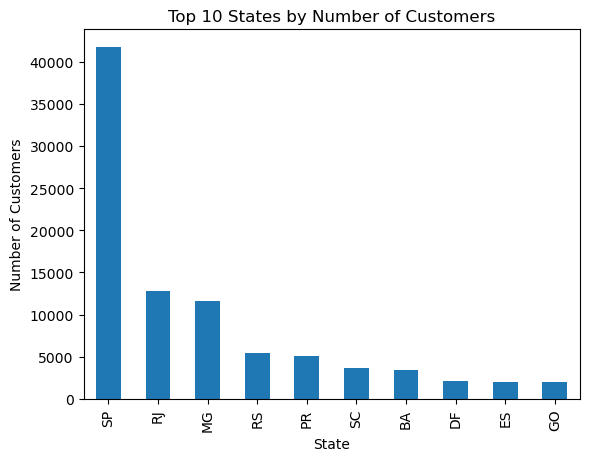

In [3]:
import matplotlib.pyplot as plt
customers["customer_state"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 States by Number of Customers")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()

In [4]:
orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.shape
orders.info()

<class 'pandas.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   order_id                       99441 non-null  str  
 1   customer_id                    99441 non-null  str  
 2   order_status                   99441 non-null  str  
 3   order_purchase_timestamp       99441 non-null  str  
 4   order_approved_at              99281 non-null  str  
 5   order_delivered_carrier_date   97658 non-null  str  
 6   order_delivered_customer_date  96476 non-null  str  
 7   order_estimated_delivery_date  99441 non-null  str  
dtypes: str(8)
memory usage: 6.1 MB


In [7]:
orders["order_id"].nunique()

99441

In [8]:
orders["customer_id"].nunique()

99441

In [17]:
orders_per_customer = orders.groupby("customer_id")["order_id"].count()
orders_per_customer.describe()

count    99441.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: order_id, dtype: float64

In [18]:
customers["customer_unique_id"].nunique()

96096

In [25]:
orders_merged = orders.merge(customers, on="customer_id", how="left")

In [26]:
orders_merged["customer_unique_id"].nunique()

96096

In [28]:
orders_per_real_customer = (
    orders_merged.groupby("customer_unique_id")["order_id"].count()
)

orders_per_real_customer.describe()

count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: order_id, dtype: float64

In [29]:
repeat_customers = (orders_per_real_customer >= 2).sum()
total_customers = orders_per_real_customer.shape[0]
repeat_rate = repeat_customers / total_customers * 100

repeat_customers, total_customers, repeat_rate

(np.int64(2997), 96096, np.float64(3.1187562437562435))

In [30]:
orders_per_real_customer.value_counts().head(10)

order_id
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64